# Import Libraries

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import show
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Import Dataset

In [332]:
df_catalysis_dataset = pd.read_csv("../data/OCM-data.csv", index_col=0, header=0)
print(df_catalysis_dataset['C2s'].nunique())


6124


In [333]:

class_sample_data = df_catalysis_dataset.sample(frac = 0.40,random_state=79)
class_sample_data

,M1,M1_atom_number,M2,M2_atom_number,M3,M3_atom_number,Support,Support_ID,M2_mol,M3_mol,...,C2y,C2H6y,C2H4y,COy,CO2y,C2s,C2H6s,C2H4s,COs,CO2s
Name,,,,,,,,,,,,,,,,,,,,,
Mn-Li2MoO4/SiO2,Mn,25,Li,3,Mo,42,SiO2,11,0.37,0.185,...,1.33,1.17,0.16,18.25,9.42,4.22,3.71,0.51,57.84,29.86
SiC,n.a.,0,n.a.,0,n.a.,0,SiC,9,0.00,0.000,...,6.02,0.82,5.20,7.87,1.37,56.16,7.65,48.51,73.41,12.78
Na2WO4/SiO2,n.a.,0,Na,11,W,74,SiO2,11,0.37,0.185,...,15.48,4.52,10.96,1.16,7.01,63.36,18.50,44.86,4.75,28.69
Ce-Na2WO4/SiO2,Ce,58,Na,11,W,74,SiO2,11,0.37,0.185,...,10.90,4.21,6.69,2.04,2.87,67.53,26.08,41.45,12.64,17.78
BEA,n.a.,0,n.a.,0,n.a.,0,BEA,3,0.00,0.000,...,5.93,0.65,5.28,13.37,2.00,35.90,3.93,31.96,80.93,12.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,0.185,...,5.66,0.68,4.98,32.66,5.38,15.18,1.82,13.35,87.58,14.43
Zn-Na2WO4/SiO2,Zn,30,Na,11,W,74,SiO2,11,0.37,0.185,...,4.87,0.56,4.31,25.54,8.58,13.89,1.60,12.30,72.87,24.48
Pd-Na2WO4/SiO2,Pd,46,Na,11,W,74,SiO2,11,0.37,0.185,...,1.29,0.32,0.97,5.18,9.94,12.65,3.14,9.51,50.78,97.45


# Define Variables

In [334]:
x = class_sample_data[["CH4_flow", "O2_flow", "CT", "M2_mol", "M3_mol","Temp"]]
print(x)

                 CH4_flow  O2_flow    CT  M2_mol  M3_mol  Temp
Name                                                          
Mn-Li2MoO4/SiO2       3.0      1.5  0.50    0.37   0.185   850
SiC                   7.7      1.3  0.50    0.00   0.000   850
Na2WO4/SiO2           2.4      0.6  0.75    0.37   0.185   800
Ce-Na2WO4/SiO2        3.4      1.1  0.50    0.37   0.185   775
BEA                   6.8      1.7  0.75    0.00   0.000   850
...                   ...      ...   ...     ...     ...   ...
Mn-Na2WO4/BN          4.0      2.0  0.75    0.37   0.185   900
Zn-Na2WO4/SiO2        6.0      3.0  0.50    0.37   0.185   900
Pd-Na2WO4/SiO2        7.2      1.8  0.50    0.37   0.185   900
Mn-WOx/SiO2          13.6      3.4  0.38    0.00   0.185   900
Nb2O5                13.6      3.4  0.38    0.00   0.000   750

[5083 rows x 6 columns]


In [335]:
# CH4_conv, C2y, COy
class_sample_data['classifier'] = np.where(class_sample_data['C2s']>=50, 1, 0)
y = class_sample_data["classifier"]
print(class_sample_data[["classifier","C2s"]])

                 classifier    C2s
Name                              
Mn-Li2MoO4/SiO2           0   4.22
SiC                       1  56.16
Na2WO4/SiO2               1  63.36
Ce-Na2WO4/SiO2            1  67.53
BEA                       0  35.90
...                     ...    ...
Mn-Na2WO4/BN              0  15.18
Zn-Na2WO4/SiO2            0  13.89
Pd-Na2WO4/SiO2            0  12.65
Mn-WOx/SiO2               0  23.93
Nb2O5                     1  70.43

[5083 rows x 2 columns]


# Split the dataset into training and test

In [336]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_test

,CH4_flow,O2_flow,CT,M2_mol,M3_mol,Temp
Name,,,,,,
Ce-Na2WO4/SiO2,2.4,0.6,0.75,0.370,0.185,750
Mn-Na2WO4/SiC,4.0,2.0,0.38,0.370,0.185,850
SiCnf,6.8,1.7,0.75,0.000,0.000,900
Mn-Na2WO4/SiO2,4.0,2.0,0.75,0.370,0.185,800
Al2O3,5.7,2.8,0.75,0.000,0.000,700
...,...,...,...,...,...,...
Mn-FeMoO4/SiO2,7.2,1.8,0.50,0.185,0.185,850
BEA,10.9,1.8,0.50,0.000,0.000,700
Mn-SrWO4/SiO2,2.0,1.0,0.75,0.185,0.185,775


In [337]:
y_test.value_counts()

0    734
1    283
Name: classifier, dtype: int64

# Train the model on training set

In [338]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

# Predict

In [339]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


# Evaluate

In [340]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(clf.score(X_test,y_test))
(tn, fp, fn, tp) # true negatives, false positives, false negatives , true positives

0.7738446411012783


(658, 76, 154, 129)

Text(0.5, 1.0, 'ch4 vs temp')

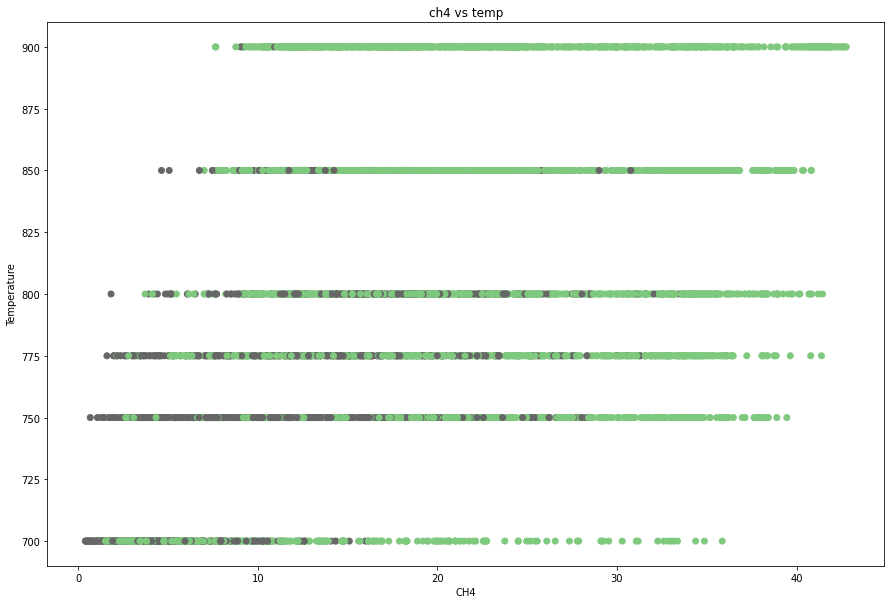

In [341]:
plt.figure(figsize=(15, 10))
plt.scatter(class_sample_data["CH4_conv"], class_sample_data["Temp"],c = class_sample_data["classifier"], cmap = 'Accent')
plt.xlabel("CH4")
plt.ylabel("Temperature")
plt.title("ch4 vs temp")

# HyperPlane

In [342]:
# Get the separating hyperplane (Only works with Linear Kernels)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

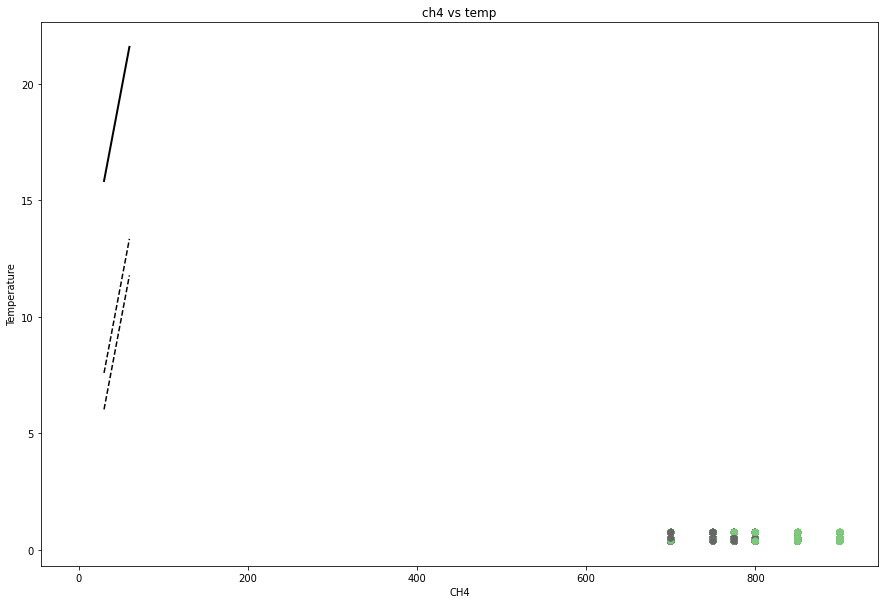

In [343]:
plt.figure(figsize=(15, 10))
plt.scatter(class_sample_data["Temp"], class_sample_data["CT"],c = class_sample_data["classifier"], cmap = 'Accent')
plt.xlabel("CH4")
plt.ylabel("Temperature")
plt.title("ch4 vs temp")
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 1], clf.support_vectors_[:, 2],
            s=80, facecolors='none');

# Method for Decision Boundaries